**Examen Primer Bimestre**

**Nombre**: Luis Lema

**Fecha**: 28/11/2025

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Redondeo a 6 cifras significativas de todo numero del problema
def round_sig(x, sig=6):
    if x == 0:
        return 0.0
    return float(f"{x:.{sig}g}")

# Aplica 5 raíces cuadradas consecutivas con redondeo
def cinco_raices(x):
    x = float(x)
    for _ in range(5):
        x = math.sqrt(x)
        x = round_sig(x, 6)
    return x

alpha = 1 / math.log(10)

# Método de Briggs para calcular logaritmo base 10 que nos pide el ejercicio
def log_briggs(x):
    k = 5
    r = cinco_raices(x)
    r = round_sig(r, 6)

    r1 = r - 1
    r1 = round_sig(r1, 6)

    log_r = alpha * r1
    log_r = round_sig(log_r, 6)

    log_x = (2 ** k) * log_r
    log_x = round_sig(log_x, 6)

    return log_x
# Lista de números para calcular logaritmo base 10
xs = [1,2,3,4,5,6,7,8,9,10]

for x in xs:   #Se calcula el log de cada numero en la lista
    if x == 1: # Casos Que ya se nos dio en el examen
        approx = 0.0

    elif x == 10:
        approx = 1.0

    elif x in [4, 8, 9]:
        approx = math.log10(x)
        approx = round_sig(approx, 6)

    elif x == 6:
        approx = math.log10(2) + math.log10(3)
        approx = round_sig(approx, 6)

    else:
        approx = log_briggs(x) 

    real = math.log10(x)
    real = round_sig(real, 6)

    if real != 0:
        error = abs((approx - real) / real)
        error = round_sig(error, 6)
    else:
        error = 0.0

    print(f"x={x}  log10≈{approx}  real={real}  error_rel={error}")


x=1  log10≈0.0  real=0.0  error_rel=0.0
x=2  log10≈0.304354  real=0.30103  error_rel=0.0110421
x=3  log10≈0.485437  real=0.477121  error_rel=0.0174295
x=4  log10≈0.60206  real=0.60206  error_rel=0.0
x=5  log10≈0.716829  real=0.69897  error_rel=0.0255505
x=6  log10≈0.778151  real=0.778151  error_rel=0.0
x=7  log10≈0.871229  real=0.845098  error_rel=0.0309207
x=8  log10≈0.90309  real=0.90309  error_rel=0.0
x=9  log10≈0.954243  real=0.954243  error_rel=0.0
x=10  log10≈1.0  real=1.0  error_rel=0.0


Máximo error absoluto: 0.0023281


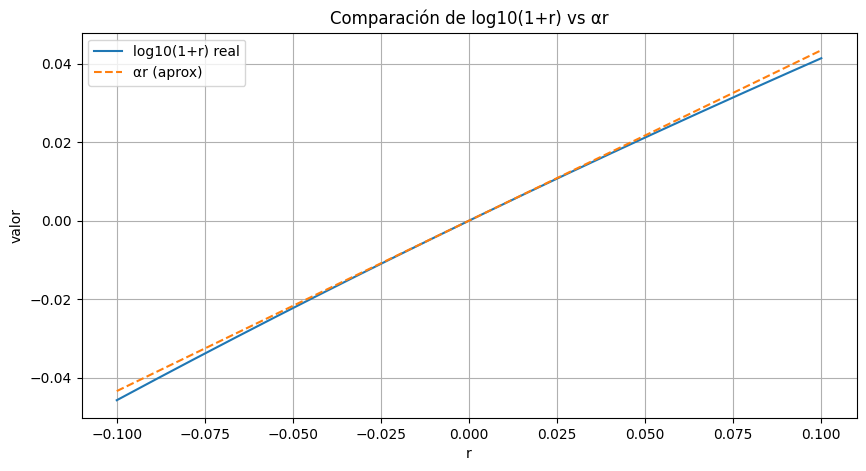

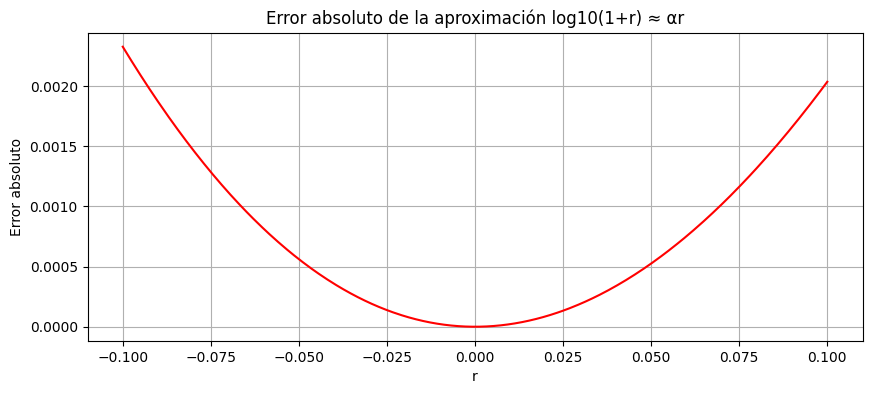

In [5]:

# α = 1 / ln(10)
alpha = 1 / math.log(10)

# Redondeo a 6 cifras significativas
def round_sig(x, sig=6):
    if x == 0:
        return 0.0
    return float(f"{x:.{sig}g}")

# Rango pequeño alrededor de cero para r
r_vals = np.linspace(-0.1, 0.1, 400)

# Función exacta y aproximada
log_real = [round_sig(math.log10(1 + r), 6) for r in r_vals]
log_aprox = [round_sig(alpha * r, 6) for r in r_vals]

# Error absoluto punto a punto
errores = [abs(a - b) for a, b in zip(log_real, log_aprox)]

# Máximo error absoluto
max_error = max(errores)
max_error = round_sig(max_error, 6)

print("Máximo error absoluto:", max_error)

# Gráfica
plt.figure(figsize=(10,5))
plt.plot(r_vals, log_real, label="log10(1+r) real")
plt.plot(r_vals, log_aprox, label="αr (aprox)", linestyle="--")
plt.xlabel("r")
plt.ylabel("valor")
plt.title("Comparación de log10(1+r) vs αr")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica del error
plt.figure(figsize=(10,4))
plt.plot(r_vals, errores, color="red")
plt.xlabel("r")
plt.ylabel("Error absoluto")
plt.title("Error absoluto de la aproximación log10(1+r) ≈ αr")
plt.grid(True)
plt.show()
